In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
import wave as w
import utils as ut

In [2]:
def build_assay_wave(id_, r0, D, beta, gamma=1.0, cutoff=1):
    """
    It created a wave object with a good tuning of the parameters.
    The object has to be run.
    """
    
    dx = ut.lin_from_two_points(np.log(r0), np.log(0.01), 0.001, np.log(1), 0.005)
    dt = ut.dt_from_cfl(0.03, D, dx)

    p = w.Vwave_pars(id_, tot_time=400, dt=dt, dx=dx, 
                     n_x_bins=int( ut.lin_from_two_points(r0, 0.01, 3, 1, 50)/dx ), 
                     M=5, r0=r0, D_coef=D, beta=beta, alpha=0.0, gamma=gamma,
                     Nh=10**12, N0=10**10, cutoff=cutoff,
                     t_burn=ut.lin_from_two_points(r0, 0.01, 200, 1, 6000), 
                     t_burn_cutoff=ut.lin_from_two_points(r0, 0.01, 70, 1, 1000), 
                     back_width_fract=ut.lin_from_two_points(np.log(r0), np.log(0.02), 0.2, np.log(1), 3),
                     traj_step=int(5/dt), check_step=int(100/dt), traj_after_burn=False, verbose=True)
    return w.Vwave(p)

## Plotting viral and immune density, coverage and fitness

In [3]:
r0 = 0.03
D = 1e-5
beta = 2

wave = build_assay_wave(0, r0, D, beta)
wave.run()

Process 0:   0%|          | 0/62595 [00:00<?, ?it/s]

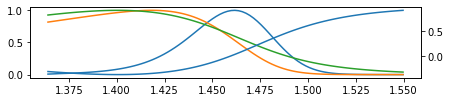

In [4]:
p = wave.p
left, right = wave.back_i+180, wave.front_i-50

fig, ax = plt.subplots(figsize=(7,1.3))
ax2 = ax.twinx()
x = np.arange(left, right)*p.dx
f = p.beta*wave.P[left:right]**p.M - (p.alpha + p.gamma)

ax.plot(x, wave.n[left:right]/np.max(wave.n[left:right]))
ax.plot(x, wave.nh[left:right]/np.max(wave.nh[left:right]))
ax.plot(x, (1-wave.P[left:right])/np.max((1-wave.P[left:right])))
ax2.plot(x, f)

#plt.savefig('figure1/sketch1.svg')

## Plotting the wave at small cross reactivity

In [37]:
r0 = 0.02
D = 1e-5
beta = 2

wave1 = build_assay_wave(0, r0, D, beta)
wave1.run()

Process 0:   0%|          | 0/85532 [00:00<?, ?it/s]

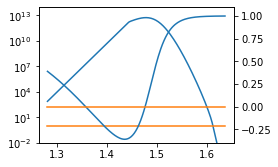

In [44]:
p = wave1.p
left, right = wave1.back_i+140, wave1.front_i-10

fig, ax = plt.subplots(figsize=(3.5,2.5))
ax2 = ax.twinx()
x = np.arange(left, right)*p.dx
f = p.beta*wave1.P[left:right]**p.M - (p.alpha + p.gamma)

ax.plot(x, wave1.n[left:right])
ax.plot(x, np.ones(len(x)))
ax.set_yscale('log')
ax.set_ylim(0.01,10**14)
ax2.plot(x, f)
#ax2.plot(x, 1 - wave1.P[left:right])
ax2.plot(x, np.zeros(len(x)))
ax2.set_ylim(-0.4,1.1)


#plt.savefig('figure1/fkpp.svg')

## Plotting the wave at large cross-reactivity

In [40]:
r0 = 1
D = 1e-5
beta = 2

wave2 = build_assay_wave(0, r0, D, beta)
wave2.run()

Process 0:   0%|          | 0/85333 [00:00<?, ?it/s]

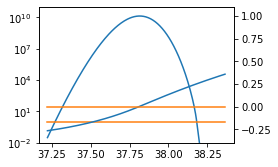

In [43]:
p = wave2.p
left, right = wave2.back_i+50, wave2.front_i+20

fig, ax = plt.subplots(figsize=(3.5,2.5))
ax2 = ax.twinx()
x = np.arange(left, right)*p.dx
f = p.beta*wave2.P[left:right]**p.M - (p.alpha + p.gamma)

ax.plot(x, wave2.n[left:right])
ax.plot(x, np.ones(len(x)))
ax.set_yscale('log')
ax.set_ylim(0.01,10**11)
ax2.plot(x, f)
ax2.plot(x, np.zeros(len(x)))
ax2.set_ylim(-0.4,1.1)


#plt.savefig('figure1/linear.svg')